# Presentación 2, Redes Neuronales Avanzadas: Stable Diffusion.

Cristian Pinoleo

Oscar Painen

## Introducción a los modelos de Difusión

### Modelos Generativos.

Un modelo generativo aprende la distribución de probabilidad del conjunto de datos tal que podemos obtener una muestra de esta distribución para generar nuevas instancias de los datos. En general, esta probabilidad no es univariada, por lo tanto la distribución a aprender es conjunta.

Por ejemplo, si entrenamos un modelo generativo con muchas imágenes de gatos, entonces podemos sacar una muestra de la distribución aprendida para generar más imágenes de gatos.

<figure>
<center>
<img src="imagenes\modelos difusion\modelos generativos\generative_vs_discriminative_alt.jpg" style="height:50%; width:80%;">
<figcaption align = "center"> Función de modelos generativos vs modelos discriminativos. </figcaption>
</figure>

Hasta el momentos hemos explorado los Generative Adversarial Networks (GANs) y Variational Autoencoders (VAEs). Sin embargo, no son los únicos modelos generativos para imágenes, sino que existen una variedad de modelos disponibles para esta misma tarea.

<figure>
<center>
<img src="imagenes\modelos difusion\modelos generativos\generative_ai_timeline.png" style="height:50%; width:60%;">
<figcaption align = "center"> Línea de tiempo de distintos modelos generativos. </figcaption>
</figure>

## Modelos de Difusión

<figure>
<center>
<img src="imagenes\modelos difusion\modelos generativos\generative_models_comparative_graphic.png" style="height:50%; width:60%;">
<figcaption align = "center"> Comparación de los resultados de distintos modelos generativos. </figcaption>
</figure>

Los modelos de difusión contienen dos pasos esenciales, forward y reverse denoising.
<figure>
<center>
<img src="imagenes\modelos difusion\modelos de difusion\diffusion_processes.PNG" style="height:50%; width:100%;">
<figcaption align = "center"> Ejemplo del proceso de difusión. </figcaption>
</figure>

<figure>
<center>
<img src="imagenes\modelos difusion\modelos de difusion\different_generative_models.png" style="height:50%; width:80%;">
<figcaption align = "center"> Comparación de la estructura de distintos modelos generativos. </figcaption>
</figure>

Dado un punto muestreado de una distribución $x_0\sim q(x)$ de los datos, definimos el *proceso de difusión hacia adelante* en donde agregamos ruido Gaussiano a la muestra en $T$ pasos, produciendo una secuencia de muestras ruidosas $x_1, x_2,\dots,x_T$. El paso con el cual agregamos el ruido está dado por $\{\beta_t\in(0,1)\}_{t=1}^{T}$, estos términos también corresponden a la varianza de la Gaussiana. Así, nuestra probabilidad condicional para movernos hacia adelante es:
$$
    q(x_t|x_{t-1}) = \mathcal{N}(x_t;\sqrt{1-\beta_t}x_{t-1},\;\beta_t\mathbb{I}),\quad q(x_{1:T}|x_0) = \Pi_{t=1}^{T}q(x_t|x_{t-1})
$$

En este sentido, debemos aplicar el ruido de manera secuencial, sin embargo, dado que nos encontramos tratando con ruido Gaussiano cadenas de Markov, podemos aplicar el famoso *truco de reparametrización* para poder obtener las imágenes ruidosas en cualquier tiempo $t$ sin la necesidad de tener todas las imágenes. De esta forma, sea $\alpha_t = 1 - \beta_t$ y $\overline{\alpha}_t = \Pi_{i=1}^{t}\alpha_i$, entonces:
$$
    q(x_t | x_0) = \mathcal{N}(x_t; \sqrt{\overline{\alpha}_t}x_0,\; (1-\overline{\alpha}_t)\mathbb{I})
$$

Notamos que en el proceso anterior no es necesario entrenar nada, simplemente puede ser aplicado directamente a una imagen cualquiera. Sin embargo, necesitamos revertir dicho proceso, aquí entran las redes neuronales. Idealmente podríamos utilizar $q(x_{t-1}|x_t)$ para volver a las imágenes originales. Desafortunadamente, no podemos aproximar $q(x_{t-1}|x_t)$ tan fácilmente. Por lo que entrenamos a la red para aprender una aproximación $p_{\theta}$, y así poder revertir el proceso. La probabilidad aproximada tiene la siguiente forma:
$$
    p_{\theta}(x_{t-1}|x_t) = \mathcal{N}(x_{t-1};\mu_{\theta}(x_t,t),\;\Sigma_{\theta}(x_t,t))
$$
Cabe destacar que la probabilidad condicional $q$ es posible de calcular cuando está condicionada en $x_0$ 
$$
    q(x_{t-1}|x_t,x_0) = \mathcal{N}(x_{t-1};\tilde{\mu}(x_t,x_0),\;\tilde{\beta}_t\mathbb{I})
$$
Donde:
$$
    \tilde{\beta}_t = \frac{1-\overline{\alpha}_{t-1}}{1-\overline{\alpha}_t}\cdot \beta_t,\quad \tilde{\mu}_t(x_t,x_0) = \frac{\sqrt{\alpha_t}(1-\overline{\alpha}_{t-1})}{1-\overline{\alpha}_t}x_t + \frac{\sqrt{\overline{\alpha}_{t-1}}\beta_t}{1-\overline{\alpha}_t}x_0
$$
Por último, notamos que podemos representar $x_0 = \frac{1}{\sqrt{\overline{\alpha}_t}}(x_t - \sqrt{1-\overline{\alpha}_t}\epsilon_t)$ con $\epsilon_t \sim \mathcal{N}(0,\mathbb{I})$, lo que nos permite escribir la media como:
$$
    \tilde{\mu}_t = \frac{1}{\sqrt{\alpha_t}}\left(x_t - \frac{1-\alpha_t}{\sqrt{1-\overline{\alpha}_t}}\epsilon_t\right)
$$

<figure>
<center>
<img src="imagenes\modelos difusion\modelos de difusion\DDPM.png" style="height:50%; width:100%;">
<figcaption align = "center"> Ejemplo del proceso de difusión. </figcaption>
</figure>

<figure>
<center>
<img src="imagenes\modelos difusion\modelos de difusion\diffusion_process_animation.gif" style="height:50%; width:80%;">
<figcaption align = "center"> Ejemplo del proceso de difusión. </figcaption>
</figure>

<figure>
<center>
<img src="imagenes\modelos difusion\modelos de difusion\nonequilibrium_thermodynamics_results.PNG" style="height:50%; width:100%;">
<figcaption align = "center"> Resultados del primer modelo de difusión sobre la base de datos CIFAR-10. </figcaption>
</figure>

Recordamos que una de nuestras metas es aproximar la media $\tilde{\mu}_t = \frac{1}{\sqrt{\alpha_t}}\left(x_t - \frac{1-\alpha_t}{\sqrt{1-\overline{\alpha}_t}}\epsilon_t\right)$ para el proceso de difusión hacia atrás $p_\theta = \mathcal{N}(x_{t-1};\mu_\theta(x_t,t),\;\Sigma_\theta(x_t,t))$. Podemos reparametrizar el término de ruido Gaussiano, así haciendo que la predicción sea $\epsilon_t$ para una imagen $x_t$ (en un paso t). Lo que resulta en:
$$
    \mu_\theta(x_t,t) = \frac{1}{\sqrt{\alpha_t}}\left(x_t - \frac{1-\alpha_t}{\sqrt{1-\overline{\alpha}_t}}\epsilon_\theta(x_t,t)\right)
$$

Gracias a esto, podemos establecer la función de pérdida, calculando el error cuadrático medio, de forma [simple](https://arxiv.org/pdf/2006.11239.pdf):
$$
    L_\text{simple}(\theta) := \mathbb{E}_{x_0\sim q(x_0), \epsilon\sim\mathcal{N}(0,\mathbb{I}), t \sim \mathcal{U}(1, T)}\left[ \|\epsilon - \epsilon_\theta(x_t,t)) \|^2 \right] = \mathbb{E}_{x_0, \epsilon, t}\left[ \|\epsilon - \epsilon_\theta(\sqrt{\overline{\alpha}_t}x_0+\sqrt{1-\overline{\alpha}_t}\epsilon,t) \|^2 \right]
$$

## Stable Diffusion

### Modelos de difusión en espacios latentes

<figure>
<center>
<img src="imagenes/stable diffusion/latent diffusion models/latent_diffusion.png" style="height:50%; width:80%;">
<figcaption align = "center"> Ejemplo del proceso de difusión en espacios latentes. </figcaption>
</figure>

<figure>
<center>
<img src="imagenes/stable diffusion/latent diffusion models/latent_diffusion_animation.gif" style="height:50%; width:80%;">
<figcaption align = "center"> Animación del proceso de difusión en espacios latentes. </figcaption>
</figure>

### Stable diffusion

<figure>
<center>
<img src="imagenes/modelos difusion/stable diffusion/stable_diffusion_architecture.png" style="height:50%; width:80%;">
<figcaption align = "center"> Arquitectura del modelo Stable Diffusion. </figcaption>
</figure>

Este es el gran modelo revolucionario propuesto en el paper. El proceso de difusión se lleva a cabo en el espacio latente. Lo que provoca obtener resultados similares o mejores que otros modelos generativos con un costo computacional y energetico menor

### Condicionamiento

In [ ]:
#!pip install tensorflow --upgrade
#!pip install keras-cv --upgrade --quiet

In [1]:
from tensorflow import keras
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import math
from PIL import Image
import keras_cv

2023-11-27 13:20:41.321328: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-11-27 13:20:41.323708: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2023-11-27 13:20:41.356737: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-11-27 13:20:41.356760: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-11-27 13:20:41.357670: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to

Using TensorFlow backend


In [2]:
model = keras_cv.models.StableDiffusion(jit_compile=True)

By using this model checkpoint, you acknowledge that its usage is subject to the terms of the CreativeML Open RAIL-M license at https://raw.githubusercontent.com/CompVis/stable-diffusion/main/LICENSE


In [3]:
prompt_1 = "A watercolor painting of a Golden Retriever at the beach"
prompt_2 = "A still life DSLR photo of a bowl of fruit"
interpolation_steps = 5

encoding_1 = tf.squeeze(model.encode_text(prompt_1))
encoding_2 = tf.squeeze(model.encode_text(prompt_2))

interpolated_encodings = tf.linspace(encoding_1, encoding_2, interpolation_steps)

# Show the size of the latent manifold
print(f"Encoding shape: {encoding_1.shape}")

1356917/1356917 [==============================] - 0s 0us/step


2023-11-27 13:21:28.957470: W tensorflow/core/common_runtime/gpu/gpu_device.cc:2256] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


492466864/492466864 [==============================] - 21s 0us/step


2023-11-27 13:21:55.941905: I external/local_xla/xla/service/service.cc:168] XLA service 0x7f7e640336a0 initialized for platform Host (this does not guarantee that XLA will be used). Devices:
2023-11-27 13:21:55.941951: I external/local_xla/xla/service/service.cc:176]   StreamExecutor device (0): Host, Default Version
2023-11-27 13:21:56.054262: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1701102118.804685 2041729 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.
2023-11-27 13:21:58.809957: E external/local_xla/xla/stream_executor/stream_executor_internal.h:177] SetPriority unimplemented for this stream.


Encoding shape: (77, 768)


In [4]:
seed = 12345
noise = tf.random.normal((512 // 8, 512 // 8, 4), seed=seed)

images = model.generate_image(
    interpolated_encodings,
    batch_size=interpolation_steps,
    diffusion_noise=noise,
)

3439090152/3439090152 [==============================] - 144s 0us/step


2023-11-27 13:25:03.672773: E external/local_xla/xla/service/slow_operation_alarm.cc:65] Constant folding an instruction is taking > 1s:

  %reduce-window.178 = f32[5,1,1,32,2]{4,3,2,1,0} reduce-window(f32[5,32,32,32,60]{4,3,2,1,0} %broadcast.537, f32[] %constant.1019), window={size=1x32x32x1x32 stride=1x32x32x1x32 pad=0_0x0_0x0_0x0_0x2_2}, to_apply=%diffusion_model_res_block_16_group_normalization_42_weighted_moments_sum_of_weights-reduction.1021

This isn't necessarily a bug; constant-folding is inherently a trade-off between compilation time and speed at runtime. XLA has some guards that attempt to keep constant folding from taking too long, but fundamentally you'll always be able to come up with an input program that takes a long time.

If you'd like to file a bug, run with envvar XLA_FLAGS=--xla_dump_to=/tmp/foo and attach the results.
2023-11-27 13:25:04.016166: E external/local_xla/xla/service/slow_operation_alarm.cc:133] The operation took 1.343523261s
Constant folding an instr

198180272/198180272 [==============================] - 9s 0us/step


2023-11-27 13:39:07.888760: E external/local_xla/xla/service/slow_operation_alarm.cc:65] Constant folding an instruction is taking > 4s:

  %reduce-window.35 = f32[5,4,4,32,1]{4,3,2,1,0} reduce-window(f32[5,128,128,32,16]{4,3,2,1,0} %broadcast.133, f32[] %constant.659), window={size=1x32x32x1x16 stride=1x32x32x1x16}, to_apply=%decoder_resnet_block_5_group_normalization_72_weighted_moments_sum_of_weights-reduction.661

This isn't necessarily a bug; constant-folding is inherently a trade-off between compilation time and speed at runtime. XLA has some guards that attempt to keep constant folding from taking too long, but fundamentally you'll always be able to come up with an input program that takes a long time.

If you'd like to file a bug, run with envvar XLA_FLAGS=--xla_dump_to=/tmp/foo and attach the results.
2023-11-27 13:39:09.114271: E external/local_xla/xla/service/slow_operation_alarm.cc:133] The operation took 5.235697336s
Constant folding an instruction is taking > 4s:

  %redu

In [5]:
def export_as_gif(filename, images, frames_per_second=10, rubber_band=False):
    if rubber_band:
        images += images[2:-1][::-1]
    images[0].save(
        filename,
        save_all=True,
        append_images=images[1:],
        duration=1000 // frames_per_second,
        loop=0,
    )


export_as_gif(
    "doggo-and-fruit-5.gif",
    [Image.fromarray(img) for img in images],
    frames_per_second=2,
    rubber_band=True,
)

<figure>
<center>
<img src="doggo-and-fruit-5.gif" style="height:50%; width:80%;">
<figcaption align = "center"> Results </figcaption>
</figure>



In [6]:
interpolation_steps = 50
batch_size = 5
batches = interpolation_steps // batch_size

interpolated_encodings = tf.linspace(encoding_1, encoding_2, interpolation_steps)
batched_encodings = tf.split(interpolated_encodings, batches)

images = []
for batch in range(batches):
    images += [
        Image.fromarray(img)
        for img in model.generate_image(
            batched_encodings[batch],
            batch_size=batch_size,
            num_steps=25,
            diffusion_noise=noise,
        )
    ]

export_as_gif("doggo-and-fruit-150.gif", images, rubber_band=True)

25/25 [==============================] - 382s 15s/step


<figure>
<center>
<img src="doggo-and-fruit-150.gif" style="height:50%; width:80%;">
<figcaption align = "center"> Results </figcaption>
</figure>


25/25 [==============================] - 253s 10s/step


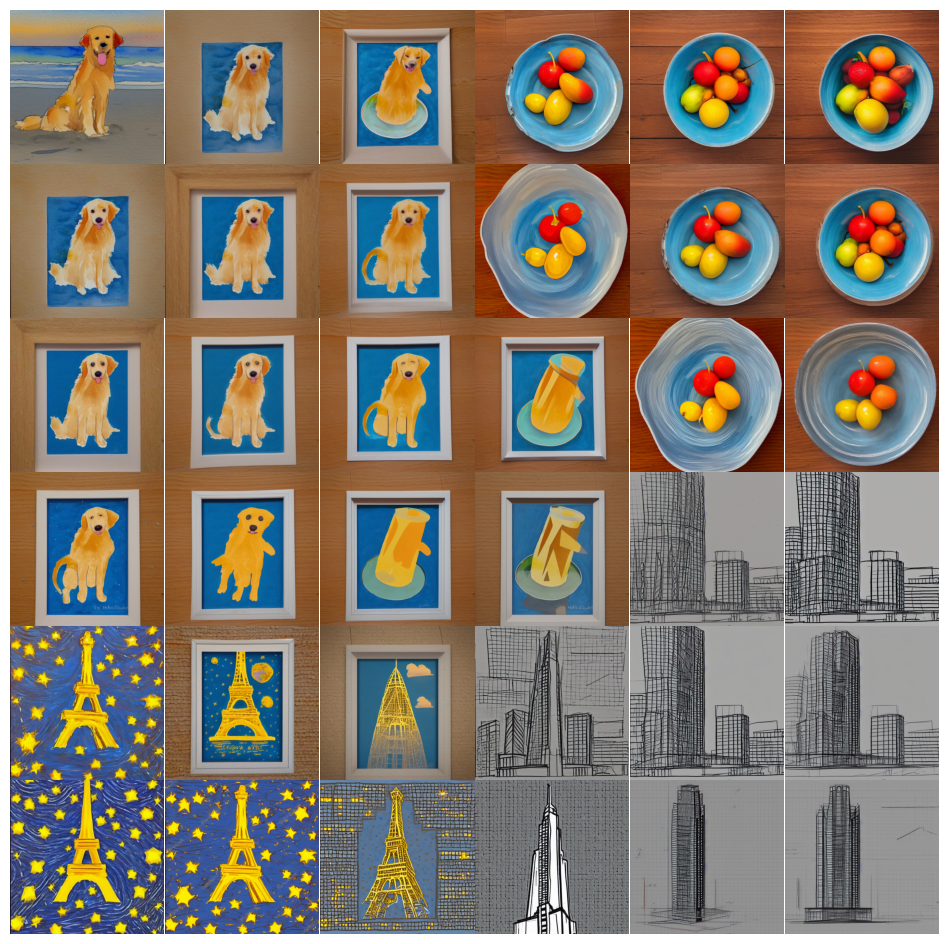

In [8]:
prompt_1 = "A watercolor painting of a Golden Retriever at the beach"
prompt_2 = "A still life DSLR photo of a bowl of fruit"
prompt_3 = "The eiffel tower in the style of starry night"
prompt_4 = "An architectural sketch of a skyscraper"

interpolation_steps = 6
batch_size = 3
batches = (interpolation_steps**2) // batch_size

encoding_1 = tf.squeeze(model.encode_text(prompt_1))
encoding_2 = tf.squeeze(model.encode_text(prompt_2))
encoding_3 = tf.squeeze(model.encode_text(prompt_3))
encoding_4 = tf.squeeze(model.encode_text(prompt_4))

interpolated_encodings = tf.linspace(
    tf.linspace(encoding_1, encoding_2, interpolation_steps),
    tf.linspace(encoding_3, encoding_4, interpolation_steps),
    interpolation_steps,
)
interpolated_encodings = tf.reshape(
    interpolated_encodings, (interpolation_steps**2, 77, 768)
)
batched_encodings = tf.split(interpolated_encodings, batches)

images = []
for batch in range(batches):
    images.append(
        model.generate_image(
            batched_encodings[batch],
            batch_size=batch_size,
            num_steps=25,
            diffusion_noise=noise,
        )
    )


def plot_grid(
    images,
    path,
    grid_size,
    scale=2,
):
    fig = plt.figure(figsize=(grid_size * scale, grid_size * scale))
    fig.tight_layout()
    plt.subplots_adjust(wspace=0, hspace=0)
    plt.margins(x=0, y=0)
    plt.axis("off")
    images = images.astype(int)
    for row in range(grid_size):
        for col in range(grid_size):
            index = row * grid_size + col
            plt.subplot(grid_size, grid_size, index + 1)
            plt.imshow(images[index].astype("uint8"))
            plt.axis("off")
            plt.margins(x=0, y=0)
    plt.savefig(
        fname=path,
        pad_inches=0,
        bbox_inches="tight",
        transparent=False,
        dpi=60,
    )


images = np.concatenate(images)
plot_grid(images, "4-way-interpolation.jpg", interpolation_steps)